# GNOD SONG RECOMMENDER SYSTEM PROTOTYPE

# PHASE 1 - Hot Songs Scraping

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
url = "https://www.billboard.com/charts/hot-100"

In [3]:
response = requests.get(url)
response.status_code

200

In [4]:
soup = BeautifulSoup(response.content, "html.parser")
soup

<!DOCTYPE html>

<html class="" lang="">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, user-scalable=no" name="viewport"/>
<title>The Hot 100 Chart | Billboard</title>
<meta content="The Hot 100 Chart" name="title" property="title">
<meta content="@billboard" name="twitter:site"/>
<meta content="Billboard" property="og:site_name">
<meta content="article" property="og:type">
<link href="/manifest.json" rel="manifest"/>
<style>
        .chart-pro-access {
            background-image: url('https://www.billboard.com/assets/1614041119/images/piano/chart-pro-access-mb.png?7cd07667d0155c55ab3b');
        }

        @media (min-width: 769px) {
            .chart-pro-access {
                background-image: url('https://www.billboard.com/assets/1614041119/images/piano/chart-pro-access-dk.png?7cd07667d0155c55ab3b');
            }
        }
    </style>
<script async="async" data-cfasync="false" src="ht

In [5]:
#num_iter = len(soup.select("span.chart-element a"))

In [6]:
soup.find_all("span", class_= "chart-element__information__song")

[<span class="chart-element__information__song text--truncate color--primary">Drivers License</span>,
 <span class="chart-element__information__song text--truncate color--primary">Up</span>,
 <span class="chart-element__information__song text--truncate color--primary">Go Crazy</span>,
 <span class="chart-element__information__song text--truncate color--primary">34+35</span>,
 <span class="chart-element__information__song text--truncate color--primary">Blinding Lights</span>,
 <span class="chart-element__information__song text--truncate color--primary">Save Your Tears</span>,
 <span class="chart-element__information__song text--truncate color--primary">Mood</span>,
 <span class="chart-element__information__song text--truncate color--primary">Calling My Phone</span>,
 <span class="chart-element__information__song text--truncate color--primary">Positions</span>,
 <span class="chart-element__information__song text--truncate color--primary">Levitating</span>,
 <span class="chart-element__in

In [7]:
song = []
artist = []

In [8]:
num_iter = len(soup.select("ol li"))

# iterate through the result set and retrive all the data
for i in range(num_iter):
    song.append(soup.select(".chart-element__information__song")[i].get_text())
    artist.append(soup.select(".chart-element__information__artist")[i].get_text())

In [9]:
# print(song)

In [10]:
# artist

In [11]:
billboard = pd.DataFrame({'artist': artist, 'song': song})

In [12]:
billboard.index += 1

In [13]:
billboard

artist             song
1                                Olivia Rodrigo  Drivers License
2                                       Cardi B               Up
3                      Chris Brown & Young Thug         Go Crazy
4                                 Ariana Grande            34+35
5                                    The Weeknd  Blinding Lights
..                                          ...              ...
96                                       Tiesto     The Business
97   Pop Smoke Featuring A Boogie Wit da Hoodie            Hello
98                 Shawn Mendes & Justin Bieber          Monster
99                                       Mooski       Track Star
100                                      Giveon  Like I Want You

[100 rows x 2 columns]

In [14]:
url2 = 'http://www.popvortex.com/music/charts/top-100-songs.php'

In [15]:
response = requests.get(url2)
response

<Response [200]>

In [16]:
soup2 = BeautifulSoup(response.content, "html.parser")
soup2

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><title>iTunes Top 100 Songs Chart 2021</title><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="iTunes top 100 songs chart list. The most popular hit music and trending songs of 2021. Chart of today's current iTunes top 100 songs is updated daily." name="description"/><meta content="iTunes Top 100 Songs Chart 2021" property="og:title"><meta content="Chart of the top 100 songs on iTunes. Chart list of the top 100 song downloads of 2021 is updated daily." property="og:description"><meta content="article" property="og:type"><meta content="http://www.popvortex.com/images/logo-facebook.png" property="og:image"/><meta content="PopVortex" property="og:site_name"/><meta content="http://www.popvortex.com/music/charts/top-100-songs.php" property="og:url"/><meta content="100000239962942" property="fb:admins"/><meta content="178831188827052" property="fb:app_id"/><link href="/favicon.png" rel="shortcut i

In [17]:
#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p > cite

In [18]:
# soup2.select(" div.chart-content.col-xs-12.col-sm-8 > p > cite")[0].get_text()

In [19]:
#artists

In [20]:
# soup2.select("#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p > em")[0].get_text()

In [21]:
soup2.find_all(class_="title-artist")

[<p class="title-artist"><cite class="title">My Head &amp; My Heart</cite><em class="artist">Ava Max</em></p>,
 <p class="title-artist"><cite class="title">Up</cite><em class="artist">Cardi B</em></p>,
 <p class="title-artist"><cite class="title">What’s Next</cite><em class="artist">Drake</em></p>,
 <p class="title-artist"><cite class="title">Astronaut In The Ocean</cite><em class="artist">Masked Wolf</em></p>,
 <p class="title-artist"><cite class="title">Drunk (And I Don't Wanna Go Home)</cite><em class="artist">Elle King &amp; Miranda Lambert</em></p>,
 <p class="title-artist"><cite class="title">It Wasn't Me (feat. Ricardo Ducent)</cite><em class="artist">Shaggy</em></p>,
 <p class="title-artist"><cite class="title">Sweet Caroline</cite><em class="artist">Neil Diamond</em></p>,
 <p class="title-artist"><cite class="title">drivers license</cite><em class="artist">Olivia Rodrigo</em></p>,
 <p class="title-artist"><cite class="title">Everybody Wants to Rule the World</cite><em class="a

In [22]:
songs2 = []
artists2 = []
for i in range(100):
    #soup2.select("title-artist > title")[i].get_text()
    #soup2.select("title-artist > artist")[i].get_text()
    songs2.append(soup2.select(".title-artist > .title")[i].get_text())
    artists2.append(soup2.select(".title-artist > .artist")[i].get_text())

In [23]:
#songs2

In [24]:
#artists2

In [25]:
more_songs = pd.DataFrame({'artist': artists2, 'song': songs2})

In [26]:
more_songs.index += 1
more_songs

artist                                          song
1                        Ava Max                            My Head & My Heart
2                        Cardi B                                            Up
3                          Drake                                   What’s Next
4                    Masked Wolf                        Astronaut In The Ocean
5    Elle King & Miranda Lambert             Drunk (And I Don't Wanna Go Home)
..                           ...                                           ...
96                    Nick Jonas                                      Spaceman
97                   Post Malone                                       Circles
98                      Maroon 5  Moves Like Jagger (feat. Christina Aguilera)
99           Travis Scott & HVME                            Goosebumps (Remix)
100                  Spice Girls                          Wannabe (Radio Edit)

[100 rows x 2 columns]

# Getting the final list of Hot Songs

In [27]:
big_list = pd.concat([billboard, more_songs], ignore_index=True, sort=False)

In [28]:
big_list=big_list.drop_duplicates()

In [29]:
big_list.index +=1

In [30]:
big_list

artist                                          song
1              Olivia Rodrigo                               Drivers License
2                     Cardi B                                            Up
3    Chris Brown & Young Thug                                      Go Crazy
4               Ariana Grande                                         34+35
5                  The Weeknd                               Blinding Lights
..                        ...                                           ...
196                Nick Jonas                                      Spaceman
197               Post Malone                                       Circles
198                  Maroon 5  Moves Like Jagger (feat. Christina Aguilera)
199       Travis Scott & HVME                            Goosebumps (Remix)
200               Spice Girls                          Wannabe (Radio Edit)

[176 rows x 2 columns]

# PHASE 2 - Create your collection of songs & audio features

In [31]:
len(big_list['song'].unique())

174

In [32]:
big_list= pd.DataFrame(big_list)

# Getting the song features 

In [33]:
from config import *

In [34]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [35]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= Client_ID,
                                                           client_secret= Client_Secret))

In [36]:
big_list['song'].unique()

array(['Drivers License', 'Up', 'Go Crazy', '34+35', 'Blinding Lights',
       'Save Your Tears', 'Mood', 'Calling My Phone', 'Positions',
       'Levitating', 'What You Know Bout Love', 'Therefore I Am',
       'Back In Blood', 'Whoopty', 'For The Night', 'Dakiti', 'Good Days',
       'I Hope', "You're Mines Still", 'Better Together',
       'You Broke Me First.', 'Streets', 'On Me', "My Ex's Best Friend",
       'Good Time', 'Throat Baby (Go Baby)', 'Holy', 'Best Friend',
       'Willow', 'Lonely', 'Bang!', 'No More Parties', 'Anyone',
       'Lemonade', 'Just The Way', 'Put Your Records On', 'Down To One',
       'Without You', 'Laugh Now Cry Later', 'Starting Over', 'Body',
       'Cry Baby', 'Time Today', "What's Your Country Song", 'Damage',
       'Beers And Sunshine', 'Beat Box', 'The Good Ones', "We're Good",
       'Dynamite', 'Buss It', 'Wasted On You', 'Clouds', 'Telepatia',
       'Monsters', 'Goosebumps', 'Golden', 'La Noche de Anoche',
       'My Head And My Heart', 'Lon

In [37]:
#testing the spotify search on one song

In [38]:
song_test=sp.search(q='Wine, Beer, Whiskey', limit =1)

In [39]:
song_test

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Wine%2C+Beer%2C+Whiskey&type=track&offset=0&limit=1',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3CygdxquGHurS7f9LjNLkv'},
       'href': 'https://api.spotify.com/v1/artists/3CygdxquGHurS7f9LjNLkv',
       'id': '3CygdxquGHurS7f9LjNLkv',
       'name': 'Little Big Town',
       'type': 'artist',
       'uri': 'spotify:artist:3CygdxquGHurS7f9LjNLkv'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CH',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
      'DK',
      'DM',
      'DO',
      'DZ',
 

In [40]:
#building a function to get features for my big_list songs

In [41]:
def get_features(df):
    my_dict = {'danceability': [], 'energy': [], 'key': [], 'loudness': [], 'mode': [], 'speechiness': [], 'acousticness': [],
               'instrumentalness': [],'liveness': [], 'valence': [], 'tempo': [], 'type': [], 'id': [], 'uri': [], 'track_href':[],
               'analysis_url': [], 'duration_ms': [], 'time_signature': []}
    c = 0
    for song in df['song'].values:
        if ( c > 500 ): # Too many calls to the api per minute. Let's wait a bit.
            sleep(5)
            c = 0
        else:
           # print("Retrieving features from song: ", song)
            song_res = sp.search(q=song,limit=1)
            found = True
            try:
                song_features = sp.audio_features(song_res['tracks']['items'][0]['uri'])[0]
            except:
               #print("Audio features not found!")
                found = False
                continue
            if ( found == True ):    
                for feature in list(song_features.keys()):
                    my_dict[feature].append(song_features[feature])
            else:
                for feature in list(song_features.keys()):
                    my_dict[feature].append(np.nan)
            c = c + 1
        
    return pd.DataFrame(my_dict)

In [42]:
df_features = get_features(big_list)

In [43]:
df_features.index +=1

In [44]:
df_features

danceability  energy  key  loudness  mode  speechiness  acousticness  \
1           0.585   0.436   10    -8.761     1       0.0601       0.72100   
2           0.868   0.795   11    -6.044     1       0.2690       0.00120   
3           0.755   0.578    0    -8.932     0       0.1450       0.31600   
4           0.830   0.585    0    -6.476     1       0.0940       0.23700   
5           0.514   0.730    1    -5.934     1       0.0598       0.00146   
..            ...     ...  ...       ...   ...          ...           ...   
171         0.541   0.598    5    -7.377     0       0.2340       0.32500   
172         0.695   0.762    0    -3.497     1       0.0395       0.19200   
173         0.839   0.694    6    -4.174     0       0.1870       0.14800   
174         0.841   0.593    1    -7.846     1       0.0379       0.41800   
175         0.485   0.964   11    -3.893     1       0.0708       0.00217   

     instrumentalness  liveness  valence    tempo            type  \
1            0.000013    0.1050    0.132  143.874  audio_features   
2            0.019300    0.0461    0.819  166.000  audio_features   
3            0.000000    0.2500    0.581   94.148  audio_features   
4            0.000000    0.2480    0.485  109.978  audio_features   
5            0.000095    0.0897    0.334  171.005  audio_features   
..                ...       ...      ...      ...             ...   
171          0.000000    0.1070    0.356  155.626  audio_features   
172          0.002440    0.0863    0.553  120.042  audio_features   
173          0.000000    0.0583    0.658  128.083  audio_features   
174          0.000000    0.1240    0.808  124.917  audio_features   
175          0.019800    0.3000    0.365  149.989  audio_features   

                         id                                   uri  \
1    7lPN2DXiMsVn7XUKtOW1CS  spotify:track:7lPN2DXiMsVn7XUKtOW1CS   
2    1XXimziG1uhM0eDNCZCrUl  spotify:track:1XXimziG1uhM0eDNCZCrUl   
3    1IIKrJVP1C9N7iPtG6eOsK  spotify:track:1IIKrJVP1C9N7iPtG6eOsK   
4    6Im9k8u9iIzKMrmV7BWtlF  spotify:track:6Im9k8u9iIzKMrmV7BWtlF   
5    0VjIjW4GlUZAMYd2vXMi3b  spotify:track:0VjIjW4GlUZAMYd2vXMi3b   
..                      ...                                   ...   
171  3TG88ES1Z5sMfuondaDZXV  spotify:track:3TG88ES1Z5sMfuondaDZXV   
172  21jGcNKet2qwijlDFuPiPb  spotify:track:21jGcNKet2qwijlDFuPiPb   
173  1FL90t9Am6vyR4xwshCV41  spotify:track:1FL90t9Am6vyR4xwshCV41   
174  5uEYRdEIh9Bo4fpjDd4Na9  spotify:track:5uEYRdEIh9Bo4fpjDd4Na9   
175  28Qis9EVxRAX9Vh0xmTC8z  spotify:track:28Qis9EVxRAX9Vh0xmTC8z   

                                            track_href  \
1    https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...   
2    https://api.spotify.com/v1/tracks/1XXimziG1uhM...   
3    https://api.spotify.com/v1/tracks/1IIKrJVP1C9N...   
4    https://api.spotify.com/v1/tracks/6Im9k8u9iIzK...   
5    https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...   
..                                                 ...   
171  https://api.spotify.com/v1/tracks/3TG88ES1Z5sM...   
172  https://api.spotify.com/v1/tracks/21jGcNKet2qw...   
173  https://api.spotify.com/v1/tracks/1FL90t9Am6vy...   
174  https://api.spotify.com/v1/tracks/5uEYRdEIh9Bo...   
175  https://api.spotify.com/v1/tracks/28Qis9EVxRAX...   

                                          analysis_url  duration_ms  \
1    https://api.spotify.com/v1/audio-analysis/7lPN...       242014   
2    https://api.spotify.com/v1/audio-analysis/1XXi...       156945   
3    https://api.spotify.com/v1/audio-analysis/1IIK...       176960   
4    https://api.spotify.com/v1/audio-analysis/6Im9...       173711   
5    https://api.spotify.com/v1/audio-analysis/0VjI...       200040   
..                                                 ...          ...   
171  https://api.spotify.com/v1/audio-analysis/3TG8...       197000   
172  https://api.spotify.com/v1/audio-analysis/21jG...       215280   
173  https://api.spotify.com/v1/audio-analysis/1FL9...       135042   
174  https://ap

In [45]:
big_list['song'].unique()

array(['Drivers License', 'Up', 'Go Crazy', '34+35', 'Blinding Lights',
       'Save Your Tears', 'Mood', 'Calling My Phone', 'Positions',
       'Levitating', 'What You Know Bout Love', 'Therefore I Am',
       'Back In Blood', 'Whoopty', 'For The Night', 'Dakiti', 'Good Days',
       'I Hope', "You're Mines Still", 'Better Together',
       'You Broke Me First.', 'Streets', 'On Me', "My Ex's Best Friend",
       'Good Time', 'Throat Baby (Go Baby)', 'Holy', 'Best Friend',
       'Willow', 'Lonely', 'Bang!', 'No More Parties', 'Anyone',
       'Lemonade', 'Just The Way', 'Put Your Records On', 'Down To One',
       'Without You', 'Laugh Now Cry Later', 'Starting Over', 'Body',
       'Cry Baby', 'Time Today', "What's Your Country Song", 'Damage',
       'Beers And Sunshine', 'Beat Box', 'The Good Ones', "We're Good",
       'Dynamite', 'Buss It', 'Wasted On You', 'Clouds', 'Telepatia',
       'Monsters', 'Goosebumps', 'Golden', 'La Noche de Anoche',
       'My Head And My Heart', 'Lon

In [46]:
hot_songs= df_features.reset_index(drop=True).merge(big_list.reset_index(drop=True), left_index=True, right_index=True)

In [47]:
hot_songs.index +=1

In [48]:
#song = sp.search(q='Up',limit=1)
#for feature in list(sp.audio_features(song['tracks']['items'][0]['uri'])[0].keys()):
#    print(feature)

In [49]:
hot_songs

danceability  energy  key  loudness  mode  speechiness  acousticness  \
1           0.585   0.436   10    -8.761     1       0.0601       0.72100   
2           0.868   0.795   11    -6.044     1       0.2690       0.00120   
3           0.755   0.578    0    -8.932     0       0.1450       0.31600   
4           0.830   0.585    0    -6.476     1       0.0940       0.23700   
5           0.514   0.730    1    -5.934     1       0.0598       0.00146   
..            ...     ...  ...       ...   ...          ...           ...   
171         0.541   0.598    5    -7.377     0       0.2340       0.32500   
172         0.695   0.762    0    -3.497     1       0.0395       0.19200   
173         0.839   0.694    6    -4.174     0       0.1870       0.14800   
174         0.841   0.593    1    -7.846     1       0.0379       0.41800   
175         0.485   0.964   11    -3.893     1       0.0708       0.00217   

     instrumentalness  liveness  valence    tempo            type  \
1            0.000013    0.1050    0.132  143.874  audio_features   
2            0.019300    0.0461    0.819  166.000  audio_features   
3            0.000000    0.2500    0.581   94.148  audio_features   
4            0.000000    0.2480    0.485  109.978  audio_features   
5            0.000095    0.0897    0.334  171.005  audio_features   
..                ...       ...      ...      ...             ...   
171          0.000000    0.1070    0.356  155.626  audio_features   
172          0.002440    0.0863    0.553  120.042  audio_features   
173          0.000000    0.0583    0.658  128.083  audio_features   
174          0.000000    0.1240    0.808  124.917  audio_features   
175          0.019800    0.3000    0.365  149.989  audio_features   

                         id                                   uri  \
1    7lPN2DXiMsVn7XUKtOW1CS  spotify:track:7lPN2DXiMsVn7XUKtOW1CS   
2    1XXimziG1uhM0eDNCZCrUl  spotify:track:1XXimziG1uhM0eDNCZCrUl   
3    1IIKrJVP1C9N7iPtG6eOsK  spotify:track:1IIKrJVP1C9N7iPtG6eOsK   
4    6Im9k8u9iIzKMrmV7BWtlF  spotify:track:6Im9k8u9iIzKMrmV7BWtlF   
5    0VjIjW4GlUZAMYd2vXMi3b  spotify:track:0VjIjW4GlUZAMYd2vXMi3b   
..                      ...                                   ...   
171  3TG88ES1Z5sMfuondaDZXV  spotify:track:3TG88ES1Z5sMfuondaDZXV   
172  21jGcNKet2qwijlDFuPiPb  spotify:track:21jGcNKet2qwijlDFuPiPb   
173  1FL90t9Am6vyR4xwshCV41  spotify:track:1FL90t9Am6vyR4xwshCV41   
174  5uEYRdEIh9Bo4fpjDd4Na9  spotify:track:5uEYRdEIh9Bo4fpjDd4Na9   
175  28Qis9EVxRAX9Vh0xmTC8z  spotify:track:28Qis9EVxRAX9Vh0xmTC8z   

                                            track_href  \
1    https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...   
2    https://api.spotify.com/v1/tracks/1XXimziG1uhM...   
3    https://api.spotify.com/v1/tracks/1IIKrJVP1C9N...   
4    https://api.spotify.com/v1/tracks/6Im9k8u9iIzK...   
5    https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...   
..                                                 ...   
171  https://api.spotify.com/v1/tracks/3TG88ES1Z5sM...   
172  https://api.spotify.com/v1/tracks/21jGcNKet2qw...   
173  https://api.spotify.com/v1/tracks/1FL90t9Am6vy...   
174  https://api.spotify.com/v1/tracks/5uEYRdEIh9Bo...   
175  https://api.spotify.com/v1/tracks/28Qis9EVxRAX...   

                                          analysis_url  duration_ms  \
1    https://api.spotify.com/v1/audio-analysis/7lPN...       242014   
2    https://api.spotify.com/v1/audio-analysis/1XXi...       156945   
3    https://api.spotify.com/v1/audio-analysis/1IIK...       176960   
4    https://api.spotify.com/v1/audio-analysis/6Im9...       173711   
5    https://api.spotify.com/v1/audio-analysis/0VjI...       200040   
..                                                 ...          ...   
171  https://api.spotify.com/v1/audio-analysis/3TG8...       197000   
172  https://api.spotify.com/v1/audio-analysis/21jG...       215280   
173  https://api.spotify.com/v1/audio-analysis/1FL9...       135042   
174  https://ap

In [50]:
hot_songs.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
artist              0
song                0
dtype: int64

In [51]:
# splitting the categorical and numerical

In [52]:
cat_hot_songs = hot_songs[['type','id','uri','track_href','analysis_url','duration_ms','time_signature','artist','song']]

In [53]:
new_hot_songs=hot_songs.drop(hot_songs[['type','id','uri','track_href','analysis_url','duration_ms','time_signature','artist','song']],axis=1)

In [54]:
cat_hot_songs 

type                      id  \
1    audio_features  7lPN2DXiMsVn7XUKtOW1CS   
2    audio_features  1XXimziG1uhM0eDNCZCrUl   
3    audio_features  1IIKrJVP1C9N7iPtG6eOsK   
4    audio_features  6Im9k8u9iIzKMrmV7BWtlF   
5    audio_features  0VjIjW4GlUZAMYd2vXMi3b   
..              ...                     ...   
171  audio_features  3TG88ES1Z5sMfuondaDZXV   
172  audio_features  21jGcNKet2qwijlDFuPiPb   
173  audio_features  1FL90t9Am6vyR4xwshCV41   
174  audio_features  5uEYRdEIh9Bo4fpjDd4Na9   
175  audio_features  28Qis9EVxRAX9Vh0xmTC8z   

                                      uri  \
1    spotify:track:7lPN2DXiMsVn7XUKtOW1CS   
2    spotify:track:1XXimziG1uhM0eDNCZCrUl   
3    spotify:track:1IIKrJVP1C9N7iPtG6eOsK   
4    spotify:track:6Im9k8u9iIzKMrmV7BWtlF   
5    spotify:track:0VjIjW4GlUZAMYd2vXMi3b   
..                                    ...   
171  spotify:track:3TG88ES1Z5sMfuondaDZXV   
172  spotify:track:21jGcNKet2qwijlDFuPiPb   
173  spotify:track:1FL90t9Am6vyR4xwshCV41   
174  spotify:track:5uEYRdEIh9Bo4fpjDd4Na9   
175  spotify:track:28Qis9EVxRAX9Vh0xmTC8z   

                                            track_href  \
1    https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...   
2    https://api.spotify.com/v1/tracks/1XXimziG1uhM...   
3    https://api.spotify.com/v1/tracks/1IIKrJVP1C9N...   
4    https://api.spotify.com/v1/tracks/6Im9k8u9iIzK...   
5    https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...   
..                                                 ...   
171  https://api.spotify.com/v1/tracks/3TG88ES1Z5sM...   
172  https://api.spotify.com/v1/tracks/21jGcNKet2qw...   
173  https://api.spotify.com/v1/tracks/1FL90t9Am6vy...   
174  https://api.spotify.com/v1/tracks/5uEYRdEIh9Bo...   
175  https://api.spotify.com/v1/tracks/28Qis9EVxRAX...   

                                          analysis_url  duration_ms  \
1    https://api.spotify.com/v1/audio-analysis/7lPN...       242014   
2    https://api.spotify.com/v1/audio-analysis/1XXi...       156945   
3    https://api.spotify.com/v1/audio-analysis/1IIK...       176960   
4    https://api.spotify.com/v1/audio-analysis/6Im9...       173711   
5    https://api.spotify.com/v1/audio-analysis/0VjI...       200040   
..                                                 ...          ...   
171  https://api.spotify.com/v1/audio-analysis/3TG8...       197000   
172  https://api.spotify.com/v1/audio-analysis/21jG...       215280   
173  https://api.spotify.com/v1/audio-analysis/1FL9...       135042   
174  https://api.spotify.com/v1/audio-analysis/5uEY...       162803   
175  https://api.spotify.com/v1/audio-analysis/28Qi...       204565   

     time_signature                    artist  \
1                 4            Olivia Rodrigo   
2                 4                   Cardi B   
3                 4  Chris Brown & Young Thug   
4                 4             Ariana Grande   
5                 4                The Weeknd   
..              ...                       ...   
171               4               Tones And I   
172               4                Nick Jonas   
173               4               Post Malone   
174               4                  Maroon 5   
175               4       Travis Scott & HVME   

                                             song  
1                                 Drivers License  
2                                              Up  
3                                        Go Crazy  
4                                           34+35  
5                                 Blinding Lights  
..                                            ...  
171                                  Dance Monkey  
172                                      Spaceman  
173                                       Circles  
174  Moves Like Jagger (feat. Christina Aguilera)  
175                            Goosebumps (Remix)  

[175 rows x 9 columns]

In [55]:
new_hot_songs

danceability  energy  key  loudness  mode  speechiness  acousticness  \
1           0.585   0.436   10    -8.761     1       0.0601       0.72100   
2           0.868   0.795   11    -6.044     1       0.2690       0.00120   
3           0.755   0.578    0    -8.932     0       0.1450       0.31600   
4           0.830   0.585    0    -6.476     1       0.0940       0.23700   
5           0.514   0.730    1    -5.934     1       0.0598       0.00146   
..            ...     ...  ...       ...   ...          ...           ...   
171         0.541   0.598    5    -7.377     0       0.2340       0.32500   
172         0.695   0.762    0    -3.497     1       0.0395       0.19200   
173         0.839   0.694    6    -4.174     0       0.1870       0.14800   
174         0.841   0.593    1    -7.846     1       0.0379       0.41800   
175         0.485   0.964   11    -3.893     1       0.0708       0.00217   

     instrumentalness  liveness  valence    tempo  
1            0.000013    0.1050    0.132  143.874  
2            0.019300    0.0461    0.819  166.000  
3            0.000000    0.2500    0.581   94.148  
4            0.000000    0.2480    0.485  109.978  
5            0.000095    0.0897    0.334  171.005  
..                ...       ...      ...      ...  
171          0.000000    0.1070    0.356  155.626  
172          0.002440    0.0863    0.553  120.042  
173          0.000000    0.0583    0.658  128.083  
174          0.000000    0.1240    0.808  124.917  
175          0.019800    0.3000    0.365  149.989  

[175 rows x 11 columns]

In [56]:
# Getting the kaggle Spotify Song Attributes

In [57]:
spotify_data=pd.read_csv('data.csv')

In [58]:
spotify_data.head()

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1             4.0    0.588       1         Redbone  Childish Gambino  
2             4.0    0.173       1    Xanny Family            Future  
3             4.0    0.230       1  Master Of None       Beach House  
4             4.0    0.904       1  Parallel Lines       Junior Boys

In [59]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [60]:
spotify_data=spotify_data.drop(spotify_data[['Unnamed: 0']],axis=1)

In [61]:
spotify_data.describe()

acousticness  danceability   duration_ms       energy  \
count   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean       0.187590      0.618422  2.463062e+05     0.681577   
std        0.259989      0.161029  8.198181e+04     0.210273   
min        0.000003      0.122000  1.604200e+04     0.014800   
25%        0.009630      0.514000  2.000150e+05     0.563000   
50%        0.063300      0.631000  2.292610e+05     0.715000   
75%        0.265000      0.738000  2.703330e+05     0.846000   
max        0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

In [62]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [63]:
# splitting the data to categorical and numerical

In [64]:
cat_spotify = spotify_data[['song_title','artist']]

In [65]:
spotify_data=spotify_data.drop(spotify_data[['song_title','artist']],axis=1)

In [66]:
spotify_data

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

      liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0       0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1       0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2       0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3       0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4       0.4390   -11.648     0       0.0694  174.004             4.0    0.904   
...        ...       ...   ...          ...      ...             ...      ...   
2012    0.1290    -3.501     1       0.3330   74.976             4.0    0.211   
2013    0.0528    -2.663     1       0.1310  110.041             4.0    0.867   
2014    0.2140    -2.467     1       0.1070  150.082             4.0    0.470   
2015    0.0913    -2.735     1       0.1330  150.011             4.0    0.623   
2016    0.2180    -6.221     1       0.1410  190.013             4.0    0.402   

      target  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
2012       0  
2013       0  
2014       0  
2015       0  
2016       0  

[2017 rows x 14 columns]

In [67]:
spotify_data =spotify_data.drop(spotify_data[['duration_ms','time_signature','target']],axis=1)

In [68]:
#Scaling the data

In [69]:
scaler = StandardScaler()

In [70]:
scaler = scaler.fit(spotify_data)

In [71]:
sp_data_prep = scaler.transform(spotify_data)

In [72]:
sp_data_prep = pd.DataFrame(sp_data_prep, columns=spotify_data.columns)

In [73]:
sp_data_prep.head()

acousticness  danceability    energy  instrumentalness       key  liveness  \
0     -0.682467      1.332874 -1.177700         -0.407864 -0.916446 -0.166291   
1      0.043897      0.773830 -1.534468         -0.465683 -1.190619 -0.346454   
2     -0.589363      1.363932 -1.282352         -0.487200 -0.916446 -0.204897   
3      1.602040     -0.772860 -1.634363          1.379429 -0.093928 -0.634715   
4     -0.029201      0.370075 -0.573574          1.386753 -0.093928  1.596735   

   loudness      mode  speechiness     tempo   valence  
0 -0.454530  0.795738     3.763084  1.066709 -0.853039  
1 -0.881573  0.795738    -0.147529  1.442323  0.368970  
2 -0.016586  0.795738     2.183712 -1.745166 -1.310280  
3 -2.167220  0.795738    -0.740350 -1.316964 -1.079636  
4 -1.213155 -1.256696    -0.258753  1.964120  1.647627

In [74]:
#attaching the columns in both datasets

In [75]:
spotify_data.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence'],
      dtype='object')

In [76]:
columnsTitles = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']

new_hot_songs_prep = new_hot_songs.reindex(columns=columnsTitles)

In [77]:
new_hot_songs_prep

acousticness  danceability  energy  instrumentalness  key  liveness  \
1         0.72100         0.585   0.436          0.000013   10    0.1050   
2         0.00120         0.868   0.795          0.019300   11    0.0461   
3         0.31600         0.755   0.578          0.000000    0    0.2500   
4         0.23700         0.830   0.585          0.000000    0    0.2480   
5         0.00146         0.514   0.730          0.000095    1    0.0897   
..            ...           ...     ...               ...  ...       ...   
171       0.32500         0.541   0.598          0.000000    5    0.1070   
172       0.19200         0.695   0.762          0.002440    0    0.0863   
173       0.14800         0.839   0.694          0.000000    6    0.0583   
174       0.41800         0.841   0.593          0.000000    1    0.1240   
175       0.00217         0.485   0.964          0.019800   11    0.3000   

     loudness  mode  speechiness    tempo  valence  
1      -8.761     1       0.0601  143.874    0.132  
2      -6.044     1       0.2690  166.000    0.819  
3      -8.932     0       0.1450   94.148    0.581  
4      -6.476     1       0.0940  109.978    0.485  
5      -5.934     1       0.0598  171.005    0.334  
..        ...   ...          ...      ...      ...  
171    -7.377     0       0.2340  155.626    0.356  
172    -3.497     1       0.0395  120.042    0.553  
173    -4.174     0       0.1870  128.083    0.658  
174    -7.846     1       0.0379  124.917    0.808  
175    -3.893     1       0.0708  149.989    0.365  

[175 rows x 11 columns]

In [78]:
# scaling my hot song list data

In [79]:
new_hot_songs_prep = scaler.transform(new_hot_songs_prep)

In [80]:
new_hot_songs_prep = pd.DataFrame(new_hot_songs_prep, columns=new_hot_songs.columns)

In [81]:
new_hot_songs_prep

danceability    energy       key  loudness      mode  speechiness  \
0        2.052170 -0.207604 -1.168186 -0.488009  1.276935    -0.552355   
1       -0.717092  1.550280  0.539541 -0.417385  1.551108    -0.931341   
2        0.494027  0.848369 -0.492706 -0.488057 -1.464792     0.380633   
3        0.190093  1.314239 -0.459408 -0.488057 -1.464792     0.367764   
4       -0.716092 -0.648627  0.230343 -0.487707 -1.190619    -0.650801   
..            ...       ...       ...       ...       ...          ...   
170      0.528653 -0.480914 -0.397568 -0.488057 -0.093928    -0.539486   
171      0.016966  0.475673  0.382564 -0.479122 -1.464792    -0.672678   
172     -0.152313  1.370143  0.059094 -0.488057  0.180244    -0.852841   
173      0.886449  1.382567 -0.421353 -0.488057 -1.190619    -0.430101   
174     -0.713360 -0.828764  1.343458 -0.415554  1.551108     0.702353   

     acousticness  instrumentalness  liveness   valence     tempo  
0       -0.445490          0.795738 -0.362191  0.834767 -1.476182  
1        0.276972          0.795738  1.961265  1.664108  1.303684  
2       -0.490959         -1.256696  0.582096 -1.029097  0.340645  
3        0.162102          0.795738  0.014857 -0.435746 -0.047808  
4        0.306222          0.795738 -0.365527  1.851709 -0.658812  
..            ...               ...       ...       ...       ...  
170     -0.077478         -1.256696  1.571984  1.275263 -0.569792  
171      0.954231          0.795738 -0.591311 -0.058521  0.227346  
172      0.774213         -1.256696  1.049234  0.242878  0.652216  
173     -0.202187          0.795738 -0.609106  0.124207  1.259174  
174      0.848932          0.795738 -0.243182  1.063973 -0.533374  

[175 rows x 11 columns]

In [82]:
new_hot_songs # just to check the scaling

danceability  energy  key  loudness  mode  speechiness  acousticness  \
1           0.585   0.436   10    -8.761     1       0.0601       0.72100   
2           0.868   0.795   11    -6.044     1       0.2690       0.00120   
3           0.755   0.578    0    -8.932     0       0.1450       0.31600   
4           0.830   0.585    0    -6.476     1       0.0940       0.23700   
5           0.514   0.730    1    -5.934     1       0.0598       0.00146   
..            ...     ...  ...       ...   ...          ...           ...   
171         0.541   0.598    5    -7.377     0       0.2340       0.32500   
172         0.695   0.762    0    -3.497     1       0.0395       0.19200   
173         0.839   0.694    6    -4.174     0       0.1870       0.14800   
174         0.841   0.593    1    -7.846     1       0.0379       0.41800   
175         0.485   0.964   11    -3.893     1       0.0708       0.00217   

     instrumentalness  liveness  valence    tempo  
1            0.000013    0.1050    0.132  143.874  
2            0.019300    0.0461    0.819  166.000  
3            0.000000    0.2500    0.581   94.148  
4            0.000000    0.2480    0.485  109.978  
5            0.000095    0.0897    0.334  171.005  
..                ...       ...      ...      ...  
171          0.000000    0.1070    0.356  155.626  
172          0.002440    0.0863    0.553  120.042  
173          0.000000    0.0583    0.658  128.083  
174          0.000000    0.1240    0.808  124.917  
175          0.019800    0.3000    0.365  149.989  

[175 rows x 11 columns]

In [83]:
frames = [new_hot_songs_prep, spotify_data]

In [84]:
song_base = pd.concat(frames)

In [85]:
song_base

danceability    energy       key  loudness      mode  speechiness  \
0         2.052170 -0.207604 -1.168186 -0.488009  1.276935    -0.552355   
1        -0.717092  1.550280  0.539541 -0.417385  1.551108    -0.931341   
2         0.494027  0.848369 -0.492706 -0.488057 -1.464792     0.380633   
3         0.190093  1.314239 -0.459408 -0.488057 -1.464792     0.367764   
4        -0.716092 -0.648627  0.230343 -0.487707 -1.190619    -0.650801   
...            ...       ...       ...       ...       ...          ...   
2012      0.584000  0.932000  1.000000 -3.501000  1.000000     0.333000   
2013      0.894000  0.892000  1.000000 -2.663000  1.000000     0.131000   
2014      0.637000  0.935000  0.000000 -2.467000  1.000000     0.107000   
2015      0.557000  0.992000  1.000000 -2.735000  1.000000     0.133000   
2016      0.446000  0.915000  9.000000 -6.221000  1.000000     0.141000   

      acousticness  instrumentalness  liveness   valence       tempo  
0        -0.445490          0.795738 -0.362191  0.834767   -1.476182  
1         0.276972          0.795738  1.961265  1.664108    1.303684  
2        -0.490959         -1.256696  0.582096 -1.029097    0.340645  
3         0.162102          0.795738  0.014857 -0.435746   -0.047808  
4         0.306222          0.795738 -0.365527  1.851709   -0.658812  
...            ...               ...       ...       ...         ...  
2012      0.001060          0.002690  0.129000  0.211000   74.976000  
2013      0.087700          0.001670  0.052800  0.867000  110.041000  
2014      0.008570          0.003990  0.214000  0.470000  150.082000  
2015      0.001640          0.677000  0.091300  0.623000  150.011000  
2016      0.002810          0.000039  0.218000  0.402000  190.013000  

[2192 rows x 11 columns]

In [86]:
cat_spotify

song_title            artist
0                                 Mask Off            Future
1                                  Redbone  Childish Gambino
2                             Xanny Family            Future
3                           Master Of None       Beach House
4                           Parallel Lines       Junior Boys
...                                    ...               ...
2012   Like A Bitch - Kill The Noise Remix    Kill The Noise
2013                                 Candy    Dillon Francis
2014  Habit - Dack Janiels & Wenzday Remix          Rain Man
2015                         First Contact        Twin Moons
2016                    I Wanna Get Better         Bleachers

[2017 rows x 2 columns]

In [87]:
cat_spotify=cat_spotify.rename(columns={'song_title': "song"})

In [88]:
#cat_hot_songs

In [89]:
#Getting the full song/artist list & the list of features

In [90]:
result = cat_hot_songs.append(cat_spotify,ignore_index=True)

In [91]:
song_artist= result[['artist','song']]

In [92]:
song_base

danceability    energy       key  loudness      mode  speechiness  \
0         2.052170 -0.207604 -1.168186 -0.488009  1.276935    -0.552355   
1        -0.717092  1.550280  0.539541 -0.417385  1.551108    -0.931341   
2         0.494027  0.848369 -0.492706 -0.488057 -1.464792     0.380633   
3         0.190093  1.314239 -0.459408 -0.488057 -1.464792     0.367764   
4        -0.716092 -0.648627  0.230343 -0.487707 -1.190619    -0.650801   
...            ...       ...       ...       ...       ...          ...   
2012      0.584000  0.932000  1.000000 -3.501000  1.000000     0.333000   
2013      0.894000  0.892000  1.000000 -2.663000  1.000000     0.131000   
2014      0.637000  0.935000  0.000000 -2.467000  1.000000     0.107000   
2015      0.557000  0.992000  1.000000 -2.735000  1.000000     0.133000   
2016      0.446000  0.915000  9.000000 -6.221000  1.000000     0.141000   

      acousticness  instrumentalness  liveness   valence       tempo  
0        -0.445490          0.795738 -0.362191  0.834767   -1.476182  
1         0.276972          0.795738  1.961265  1.664108    1.303684  
2        -0.490959         -1.256696  0.582096 -1.029097    0.340645  
3         0.162102          0.795738  0.014857 -0.435746   -0.047808  
4         0.306222          0.795738 -0.365527  1.851709   -0.658812  
...            ...               ...       ...       ...         ...  
2012      0.001060          0.002690  0.129000  0.211000   74.976000  
2013      0.087700          0.001670  0.052800  0.867000  110.041000  
2014      0.008570          0.003990  0.214000  0.470000  150.082000  
2015      0.001640          0.677000  0.091300  0.623000  150.011000  
2016      0.002810          0.000039  0.218000  0.402000  190.013000  

[2192 rows x 11 columns]

# Clustering the songs

In [93]:
song_base.describe()

danceability       energy          key     loudness         mode  \
count   2192.000000  2192.000000  2192.000000  2192.000000  2192.000000   
mean       0.582562     0.648731     4.892816    -6.555970     0.563543   
std        0.324811     0.358192     3.825143     4.032380     0.566813   
min       -0.721605    -3.195385    -2.638069   -33.097000    -1.464792   
25%        0.487750     0.533000     1.000000    -8.155000     0.000000   
50%        0.622000     0.709000     5.000000    -6.035500     1.000000   
75%        0.736000     0.848000     8.000000    -4.284250     1.000000   
max        2.602329     2.152805    11.000000     2.657375     1.551108   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  2192.000000   2192.000000       2192.000000  2192.000000  2192.000000   
mean      0.073325      0.178495          0.125312     0.189109     0.441321   
std       0.271691      0.317575          0.384635     0.423646     0.424870   
min      -1.091558     -2.419297         -1.256696    -0.768156    -2.731935   
25%       0.035400      0.008558          0.000000     0.087075     0.262000   
50%       0.052950      0.066050          0.000102     0.122000     0.473000   
75%       0.107000      0.279000          0.116000     0.246250     0.686121   
max       4.267011      1.128930          0.976000     9.535576     2.788589   

             tempo  
count  2192.000000  
mean    111.896100  
std      41.735528  
min      -1.770759  
25%      96.452500  
50%     119.886500  
75%     135.018250  
max     219.331000

In [94]:
#clustering the data, checking for the best number of clusters

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

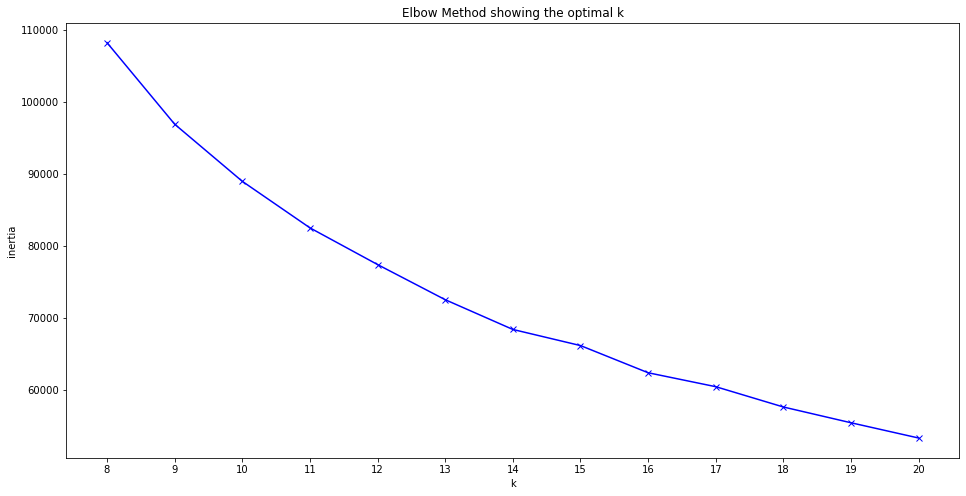

In [95]:
K = range(8, 21)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(song_base)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

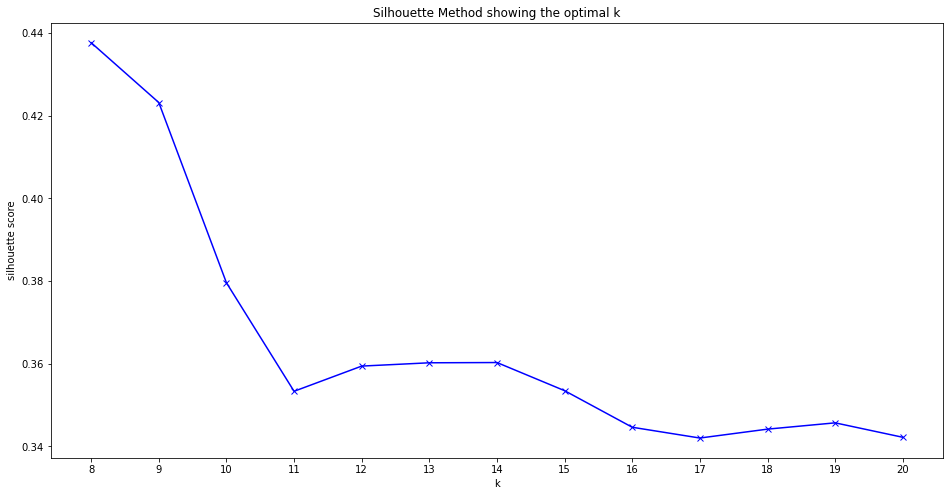

In [96]:
K = range(8, 21)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(song_base)
    silhouette.append(silhouette_score(song_base, kmeans.predict(song_base)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [97]:
kmeans = KMeans(n_clusters=13,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(song_base)
print(kmeans.inertia_)

83387.22658952804


In [98]:
kmeans = KMeans(n_clusters=11,
                init="random",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(song_base)
print(kmeans.inertia_)

90709.70542806438


In [99]:
# i decided to go with 11 clusters

In [100]:
clusters = kmeans.predict(song_base)
pd.Series(clusters).value_counts().sort_index()

0     250
1     179
2      55
3     175
4     112
5     242
6       9
7     148
8     310
9     169
10    543
dtype: int64

In [101]:
X_song_base = pd.DataFrame(song_base)
X_song_base["cluster"] = clusters
X_song_base

danceability    energy       key  loudness      mode  speechiness  \
0         2.052170 -0.207604 -1.168186 -0.488009  1.276935    -0.552355   
1        -0.717092  1.550280  0.539541 -0.417385  1.551108    -0.931341   
2         0.494027  0.848369 -0.492706 -0.488057 -1.464792     0.380633   
3         0.190093  1.314239 -0.459408 -0.488057 -1.464792     0.367764   
4        -0.716092 -0.648627  0.230343 -0.487707 -1.190619    -0.650801   
...            ...       ...       ...       ...       ...          ...   
2012      0.584000  0.932000  1.000000 -3.501000  1.000000     0.333000   
2013      0.894000  0.892000  1.000000 -2.663000  1.000000     0.131000   
2014      0.637000  0.935000  0.000000 -2.467000  1.000000     0.107000   
2015      0.557000  0.992000  1.000000 -2.735000  1.000000     0.133000   
2016      0.446000  0.915000  9.000000 -6.221000  1.000000     0.141000   

      acousticness  instrumentalness  liveness   valence       tempo  cluster  
0        -0.445490          0.795738 -0.362191  0.834767   -1.476182        3  
1         0.276972          0.795738  1.961265  1.664108    1.303684        3  
2        -0.490959         -1.256696  0.582096 -1.029097    0.340645        3  
3         0.162102          0.795738  0.014857 -0.435746   -0.047808        3  
4         0.306222          0.795738 -0.365527  1.851709   -0.658812        3  
...            ...               ...       ...       ...         ...      ...  
2012      0.001060          0.002690  0.129000  0.211000   74.976000        9  
2013      0.087700          0.001670  0.052800  0.867000  110.041000        8  
2014      0.008570          0.003990  0.214000  0.470000  150.082000        7  
2015      0.001640          0.677000  0.091300  0.623000  150.011000        7  
2016      0.002810          0.000039  0.218000  0.402000  190.013000        2  

[2192 rows x 12 columns]

In [102]:
# getting the song name together with the features

In [103]:
song_artist=song_artist.reset_index()

In [104]:
X_song_base=X_song_base.reset_index()

In [105]:
#Final song list with clusters

In [106]:
final_songs=pd.concat([song_artist, X_song_base], axis=1)

In [107]:
final_songs=final_songs.drop(['index'],axis=1)

In [108]:
final_songs

artist                                  song  \
0               Olivia Rodrigo                       Drivers License   
1                      Cardi B                                    Up   
2     Chris Brown & Young Thug                              Go Crazy   
3                Ariana Grande                                 34+35   
4                   The Weeknd                       Blinding Lights   
...                        ...                                   ...   
2187            Kill The Noise   Like A Bitch - Kill The Noise Remix   
2188            Dillon Francis                                 Candy   
2189                  Rain Man  Habit - Dack Janiels & Wenzday Remix   
2190                Twin Moons                         First Contact   
2191                 Bleachers                    I Wanna Get Better   

      danceability    energy       key  loudness      mode  speechiness  \
0         2.052170 -0.207604 -1.168186 -0.488009  1.276935    -0.552355   
1        -0.717092  1.550280  0.539541 -0.417385  1.551108    -0.931341   
2         0.494027  0.848369 -0.492706 -0.488057 -1.464792     0.380633   
3         0.190093  1.314239 -0.459408 -0.488057 -1.464792     0.367764   
4        -0.716092 -0.648627  0.230343 -0.487707 -1.190619    -0.650801   
...            ...       ...       ...       ...       ...          ...   
2187      0.584000  0.932000  1.000000 -3.501000  1.000000     0.333000   
2188      0.894000  0.892000  1.000000 -2.663000  1.000000     0.131000   
2189      0.637000  0.935000  0.000000 -2.467000  1.000000     0.107000   
2190      0.557000  0.992000  1.000000 -2.735000  1.000000     0.133000   
2191      0.446000  0.915000  9.000000 -6.221000  1.000000     0.141000   

      acousticness  instrumentalness  liveness   valence       tempo  cluster  
0        -0.445490          0.795738 -0.362191  0.834767   -1.476182        3  
1         0.276972          0.795738  1.961265  1.664108    1.303684        3  
2        -0.490959         -1.256696  0.582096 -1.029097    0.340645        3  
3         0.162102          0.795738  0.014857 -0.435746   -0.047808        3  
4         0.306222          0.795738 -0.365527  1.851709   -0.658812        3  
...            ...               ...       ...       ...         ...      ...  
2187      0.001060          0.002690  0.129000  0.211000   74.976000        9  
2188      0.087700          0.001670  0.052800  0.867000  110.041000        8  
2189      0.008570          0.003990  0.214000  0.470000  150.082000        7  
2190      0.001640          0.677000  0.091300  0.623000  150.011000        7  
2191      0.002810          0.000039  0.218000  0.402000  190.013000        2  

[2192 rows x 14 columns]

In [109]:
filtered = final_songs[(final_songs['cluster'] == 3)

In [110]:
filtered

artist                                          song  \
0              Olivia Rodrigo                               Drivers License   
1                     Cardi B                                            Up   
2    Chris Brown & Young Thug                                      Go Crazy   
3               Ariana Grande                                         34+35   
4                  The Weeknd                               Blinding Lights   
..                        ...                                           ...   
170               Tones And I                                  Dance Monkey   
171                Nick Jonas                                      Spaceman   
172               Post Malone                                       Circles   
173                  Maroon 5  Moves Like Jagger (feat. Christina Aguilera)   
174       Travis Scott & HVME                            Goosebumps (Remix)   

     danceability    energy       key  loudness      mode  speechiness  \
0        2.052170 -0.207604 -1.168186 -0.488009  1.276935    -0.552355   
1       -0.717092  1.550280  0.539541 -0.417385  1.551108    -0.931341   
2        0.494027  0.848369 -0.492706 -0.488057 -1.464792     0.380633   
3        0.190093  1.314239 -0.459408 -0.488057 -1.464792     0.367764   
4       -0.716092 -0.648627  0.230343 -0.487707 -1.190619    -0.650801   
..            ...       ...       ...       ...       ...          ...   
170      0.528653 -0.480914 -0.397568 -0.488057 -0.093928    -0.539486   
171      0.016966  0.475673  0.382564 -0.479122 -1.464792    -0.672678   
172     -0.152313  1.370143  0.059094 -0.488057  0.180244    -0.852841   
173      0.886449  1.382567 -0.421353 -0.488057 -1.190619    -0.430101   
174     -0.713360 -0.828764  1.343458 -0.415554  1.551108     0.702353   

     acousticness  instrumentalness  liveness   valence     tempo  cluster  
0       -0.445490          0.795738 -0.362191  0.834767 -1.476182        3  
1        0.276972          0.795738  1.961265  1.664108  1.303684        3  
2       -0.490959         -1.256696  0.582096 -1.029097  0.340645        3  
3        0.162102          0.795738  0.014857 -0.435746 -0.047808        3  
4        0.306222          0.795738 -0.365527  1.851709 -0.658812        3  
..            ...               ...       ...       ...       ...      ...  
170     -0.077478         -1.256696  1.571984  1.275263 -0.569792        3  
171      0.954231          0.795738 -0.591311 -0.058521  0.227346        3  
172      0.774213         -1.256696  1.049234  0.242878  0.652216        3  
173     -0.202187          0.795738 -0.609106  0.124207  1.259174        3  
174      0.848932          0.795738 -0.243182  1.063973 -0.533374        3  

[175 rows x 14 columns]

# Creating the song recommendation prototype

In [111]:
# Recommender 1 - checking if the song is on the Hot List

In [112]:
def hot_song():
    song =input("Give me a name of a song you like: ")
    if song in final_songs['song'].values:
        print("The song ", '\033[1m \033[92m' + song +  '\033[0m \033[0m ','is hot now, good choice!')
    else:
        print("Your song",'\033[1m \033[92m' + song +  '\033[0m \033[0m', " is not hot now!")
    return song

In [113]:
# user_input = hot_song()

In [114]:
# user_input = hot_song()

In [115]:
# Recommender 2 - recommending random songs from hot songs

In [116]:
def hot_song_recommender():
    song =input("Give me a name of a song you like: ")
    rc = pd.DataFrame(final_songs['song'].sample(n=3))
    if song in final_songs['song'].values:
        print("The song   ",  song   ,'  is hot now, good choice!')
        print("You may also like this:",   rc )
    else:
        print("Your song  ",  song   , "  is not hot now!")
        print("Maybe you should check this:  ", rc )
    return song


In [117]:
hot_song_recommender()

Give me a name of a song you like: moves like jagger
Your song   moves like jagger   is not hot now!
Maybe you should check this:                                  song
1449               There Is a Cloud
1454                  Be The Change
771   Good Life - Original 12'' Mix


'moves like jagger'

In [118]:
hot_song_recommender()

Give me a name of a song you like: 34+35
The song    34+35   is hot now, good choice!
You may also like this:                      song
126   my ex's best friend
555           Night Drive
1783           Satellites


'34+35'

In [119]:
# Recommender 3 - recommending a random song with cluster number

In [120]:
def hot_song_recommender2():
    song =input("Give me a name of a song you like: ")
    rc = pd.DataFrame(final_songs['song'].sample(n=3))
    rec = final_songs['song'].groupby(final_songs['cluster']).agg(np.random.choice)
   
    if song in final_songs['song'].values:
        print("The song ", '\033[1m \033[94m' + song +  '\033[0m \033[0m ','is hot now, good choice!')
        print("You may also like this:", '\033[1m \033[94m' + rec +  '\033[0m \033[0m ')
        
    else:
        print("Your song",'\033[1m \033[94m' + song +  '\033[0m \033[0m', " is not hot now!")
        print("Maybe you should check this:", '\033[1m \033[94m' + rc +  '\033[0m \033[0m ')
    

In [121]:
hot_song_recommender2()

Give me a name of a song you like: 34+35
The song   34+35   is hot now, good choice!
You may also like this: cluster
0          Will You Love Me Tomorrow  
1                        Traicionera  
2      U.O.E.N.O. Remix (feat. Future, Wiz ...
3                 Somebody's Problem  
4              Somebody Was Watching  
5                           No Waves  
6      Mozart: Requiem in D Minor, K. 626: ...
7                         Roll To Me  
8                  Un-Break My Heart  
9              And Dat (Ft. Stormzy)  
10                             Awake  
Name: song, dtype: object


In [122]:
hot_song_recommender2()

Give me a name of a song you like: my heard will go on
Your song  my heard will go on   is not hot now!
Maybe you should check this:                                                    song
1416   I Won't Let You Go - Radio Version[...
1926              Where the Party At  
1452                           Tears  


In [ ]:
# Recommender 4 - Final Version

In [ ]:
# filtered = final_songs[(final_songs['cluster'] == 2)]

In [137]:
def hot_song_recommender4():
    song =input("Give me a name of a song you like: ")
    rc = pd.DataFrame(final_songs['song'].sample(n=3))
    cluster_rec = (final_songs['cluster'].values)
    #cluster_rec=final_songs['song'].groupby(final_songs['cluster']).sample()
    same_cluster_rec= pd.DataFrame(final_songs[final_songs['cluster'] == cluster_rec], columns = final_songs.columns)
    rec = same_cluster_rec[(same_cluster_rec['song'] != song)].sample()  
    
    if song in final_songs['song'].values:
        
        print('The song: --  ' + song +  ' -- is hot now, good choice!')
        
              
        print('You may also like this hot song: ')
        print(rec['song'])
        #print(rec)
    else:
        print('Your song   --  ' + song + '  --  is not hot now!')
        print('Maybe you should check this hot songs: ')  
        print(rc)
        
  

In [139]:
hot_song_recommender4()

Give me a name of a song you like: 34+35
The song: --  34+35 -- is hot now, good choice!
You may also like this hot song: 
485    Auditorium
Name: song, dtype: object


In [140]:
hot_song_recommender4()

Give me a name of a song you like: My heart will go on
Your song   --  My heart will go on  --  is not hot now!
Maybe you should check this hot songs: 
                            song
793             Oh My - Club Mix
1799  Save the World - Radio Mix
455           Rhythm of Devotion
